In [ ]:
"""

Data set is obtained from: "https://www.kaggle.com/datasets/jimschacko/wall-following-robot-navigation-dataset"



Description:
The data were collected as the SCITOS G5 robot navigates through the room following the wall in a clockwise direction, for 4 rounds, using 24 ultrasound sensors arranged circularly around its 'waist'.

The data consists of raw values of the measurements of all 24 ultrasound sensors and the corresponding class label. Sensor readings are sampled at a rate of 9 samples per second.

The class labels are:

**Move-Forward,

Slight-Right-Turn,

Sharp-Right-Turn,

Slight-Left-Turn**

"""

"\n\nData set is obtained from:\n\n\n\nDescription:\nThe data were collected as the SCITOS G5 robot navigates through the room following the wall in a clockwise direction, for 4 rounds, using 24 ultrasound sensors arranged circularly around its 'waist'.\n\nThe data consists of raw values of the measurements of all 24 ultrasound sensors and the corresponding class label. Sensor readings are sampled at a rate of 9 samples per second.\n\nThe class labels are:\n\n**Move-Forward,\n\nSlight-Right-Turn,\n\nSharp-Right-Turn,\n\nSlight-Left-Turn**\n\n"

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


data = pd.read_csv(r"C:\Users\O.J\Downloads\Compressed\Robo.csv")

In [13]:
#self defined training function 
def train(Model, X =x, Y=y,X_train = X_train, X_test = X_test, Y_train = Y_train, Y_test = Y_test):
    

    m = Model
    m.fit(X_train,Y_train)
    pred = m.predict(X_test)
    print('\t', Model)
    print(classification_report(Y_test,pred))



In [5]:
print(data.info())
print(pd.DataFrame(data.describe()))
print(data.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5456 non-null   int64  
 1   V1      5456 non-null   float64
 2   V2      5456 non-null   float64
 3   V3      5456 non-null   float64
 4   V4      5456 non-null   float64
 5   V5      5456 non-null   float64
 6   V6      5456 non-null   float64
 7   V7      5456 non-null   float64
 8   V8      5456 non-null   float64
 9   V9      5456 non-null   float64
 10  V10     5456 non-null   float64
 11  V11     5456 non-null   float64
 12  V12     5456 non-null   float64
 13  V13     5456 non-null   float64
 14  V14     5456 non-null   float64
 15  V15     5456 non-null   float64
 16  V16     5456 non-null   float64
 17  V17     5456 non-null   float64
 18  V18     5456 non-null   float64
 19  V19     5456 non-null   float64
 20  V20     5456 non-null   float64
 21  V21     5456 non-null   float64
 22  

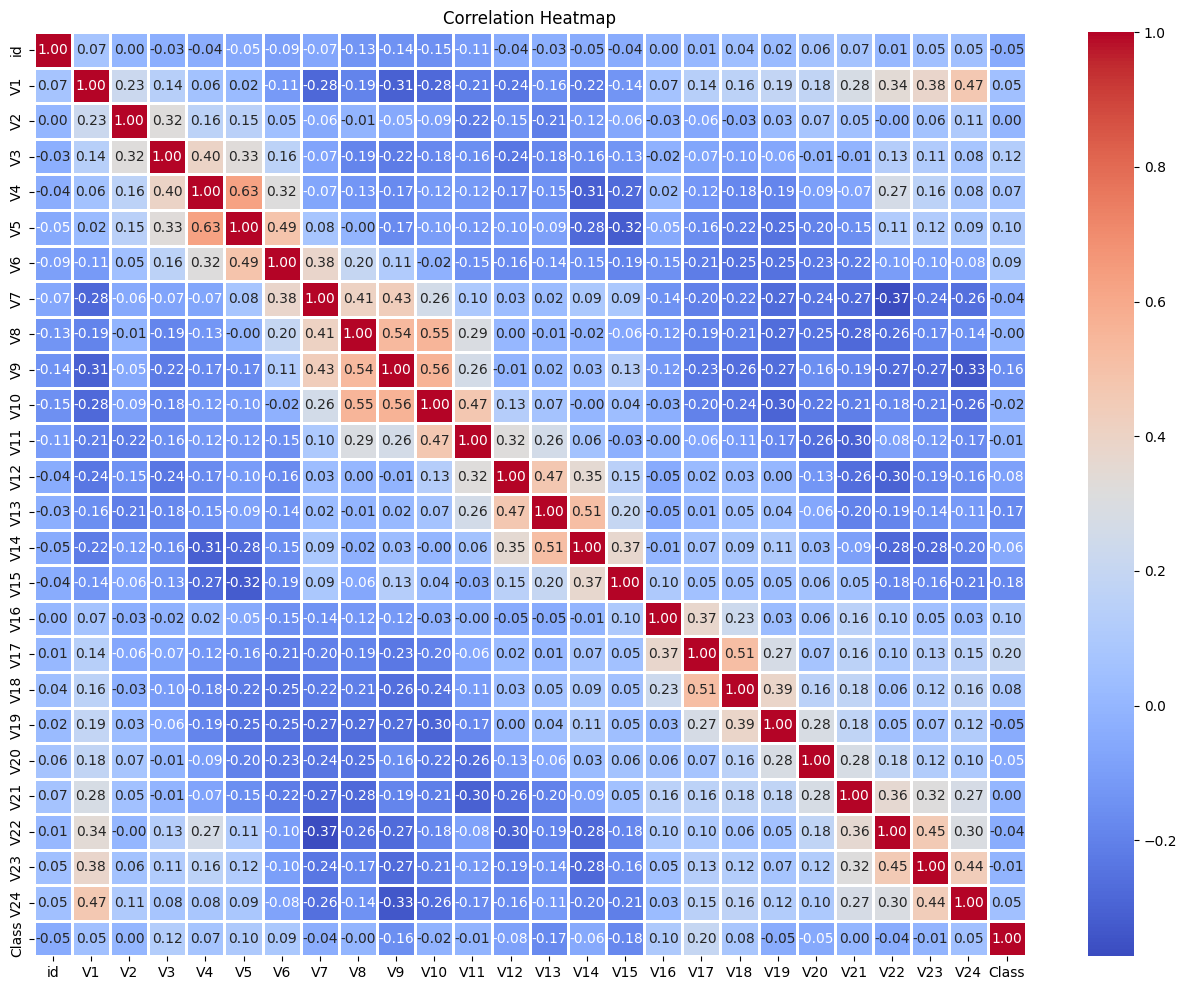

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
x = data.drop(['id','Class'], axis=1)
y = data["Class"]

print(pd.DataFrame(x).head())
print(pd.DataFrame(y).head())

      V1     V2     V3     V4   V5     V6   V7     V8     V9    V10  ...  \
0  0.438  0.498  3.625  3.645  5.0  2.918  5.0  2.351  2.332  2.643  ...   
1  0.438  0.498  3.625  3.648  5.0  2.918  5.0  2.637  2.332  2.649  ...   
2  0.438  0.498  3.625  3.629  5.0  2.918  5.0  2.637  2.334  2.643  ...   
3  0.437  0.501  3.625  3.626  5.0  2.918  5.0  2.353  2.334  2.642  ...   
4  0.438  0.498  3.626  3.629  5.0  2.918  5.0  2.640  2.334  2.639  ...   

     V15    V16    V17    V18    V19    V20    V21    V22    V23    V24  
0  1.744  0.593  0.502  0.493  0.504  0.445  0.431  0.444  0.440  0.429  
1  1.744  0.592  0.502  0.493  0.504  0.449  0.431  0.444  0.443  0.429  
2  1.744  0.593  0.502  0.493  0.504  0.449  0.431  0.444  0.446  0.429  
3  1.744  0.593  0.502  0.493  0.504  0.449  0.431  0.444  0.444  0.429  
4  1.744  0.592  0.502  0.493  0.504  0.449  0.431  0.444  0.441  0.429  

[5 rows x 24 columns]


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=43, shuffle=True) 

In [14]:
train(KNeighborsClassifier(n_neighbors= 3),x,y)
train(SVC(),x,y) 
train(GaussianNB(),x,y)


train(DecisionTreeClassifier(max_depth=3, random_state=44),x,y)
train(RandomForestClassifier(n_estimators=150, random_state=44),x,y)
train(LogisticRegression(),x,y)

	 KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.85      0.85      0.85       435
           2       0.89      0.89      0.89       440
           3       0.79      0.86      0.82        56
           4       0.87      0.84      0.86       161

    accuracy                           0.87      1092
   macro avg       0.85      0.86      0.85      1092
weighted avg       0.87      0.87      0.87      1092

	 SVC()
              precision    recall  f1-score   support

           1       0.88      0.87      0.87       435
           2       0.91      0.98      0.95       440
           3       0.90      0.93      0.91        56
           4       0.87      0.71      0.78       161

    accuracy                           0.89      1092
   macro avg       0.89      0.87      0.88      1092
weighted avg       0.89      0.89      0.89      1092

	 GaussianNB()
              precision    recall  f1-score   support

           1  

c:\Users\O.J\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\O.J\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\O.J\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

	 RandomForestClassifier(n_estimators=150, random_state=44)
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       435
           2       1.00      1.00      1.00       440
           3       0.98      0.98      0.98        56
           4       0.99      1.00      0.99       161

    accuracy                           1.00      1092
   macro avg       0.99      0.99      0.99      1092
weighted avg       1.00      1.00      1.00      1092

	 LogisticRegression()
              precision    recall  f1-score   support

           1       0.74      0.73      0.73       435
           2       0.70      0.77      0.74       440
           3       0.56      0.52      0.54        56
           4       0.65      0.52      0.58       161

    accuracy                           0.70      1092
   macro avg       0.66      0.63      0.65      1092
weighted avg       0.70      0.70      0.70      1092



c:\Users\O.J\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Checking Overfitting
scores = cross_val_score(RandomForestClassifier(), x, y, cv=5)
print(scores)

[0.97069597 0.98991751 0.99633364 0.99541705 0.9908341 ]
